PROJECT 9: A DATA ANALYSIS OF YOUR OWN
NAME: RURU & MANIKO
CONTRIBUTORS: StackOverflow https://zebrabi.com/guide/how-to-customize-heatmap-in-jupyter-notebook/#:~:text=The%20most%20commonly%20used%20libraries,customized%20heatmaps%20in%20Jupyter%20Notebook, YouTube https://www.youtube.com/watch?v=GPVsHOlRBBI
Dataset source: https://ourworldindata.org/grapher/gender-development-index

In [85]:
import requests
import json
from bs4 import BeautifulSoup

from urllib.parse import unquote, quote
from datetime import datetime

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Choosing a topic and finding data

We looked at all six sources and the one we found the most interesting was in the database called "Our World in Data". Here we found the dataset called "Gender development index". 



# Topic: Gender Development Index
Gender Development Index (GDI)
The Gender Development Index (GDI) is a composite index that measures the achievement of a country in terms of gender equality. It takes into account factors such as life expectancy, education, and income to assess the overall well-being of both men and women.


# Part 2: Conduct your Analysis & Visualization 

We decided to use Jupyter Notebook for our data analysis. Furthermore, we had four main questions.

1) What factors contribute to countries with low Gender Development Index?

2) What countries have the highest Gender Development Index?

3) What countries have the lowest Gender Development Index?

4) What is the correlation matrix between Gender Development Index and other indicators such as income, life expectancy, e.t.c?

5) Which year did countries see the highest Gender Development Index in?


# Analysis Process

There were many different techniques we used for each analysis type in this project:

Distribution Visualization: We used many different types of plots in order to help visualize the data. These include bar charts, correlation maps, scatter plots and much more. In addition to this, more datawrangling was done in the creating of 'top_countries' and 'bottom_countries' datasets for bar plot visualizations. 

Work Distribution amongst Group: Anthony Maniko and Ruru Rajbhandari both worked on this project equally.

Anthony Maniko:

found the dataset and performed a lot of the data wrangling process whereas 

Ruru Rajbhandari: 

was mainly responsible for part 3 of the presentation and some of the plots shown below. Was also responsible for the above and beyond component.


# Gender Development Index Distribution:
Calculate the mean, median, and standard deviation of the GDI.
Create a histogram to visualize the distribution of GDIs across different countries.

In [86]:
hdi_df = pd.read_csv('gender-development-index.csv')
hdi_df

,Entity,Code,Year,Gender Development Index
0,Afghanistan,AFG,1990,0.595
1,Afghanistan,AFG,1991,0.588
2,Afghanistan,AFG,1992,0.586
3,Afghanistan,AFG,1993,0.548
4,Afghanistan,AFG,1994,0.524
...,...,...,...,...
5211,Zimbabwe,ZWE,2017,0.952
5212,Zimbabwe,ZWE,2018,0.952
5213,Zimbabwe,ZWE,2019,0.955
5214,Zimbabwe,ZWE,2020,0.959


# Statistics

In [87]:
print(hdi_df.columns.tolist())

['Entity', 'Code', 'Year', 'Gender Development Index']


In [88]:
# Finding the overall mean for the GDI
mean_gdi = hdi_df["Gender Development Index"].mean()
mean_gdi

0.9192879601227009

In [89]:
# Finding the overall max fro the GDi
median_gdi = hdi_df["Gender Development Index"].median()
median_gdi

0.945

In [90]:
# Finding the standard deviation 
std_gdi = hdi_df["Gender Development Index"].std()
std_gdi

0.08257699331128965

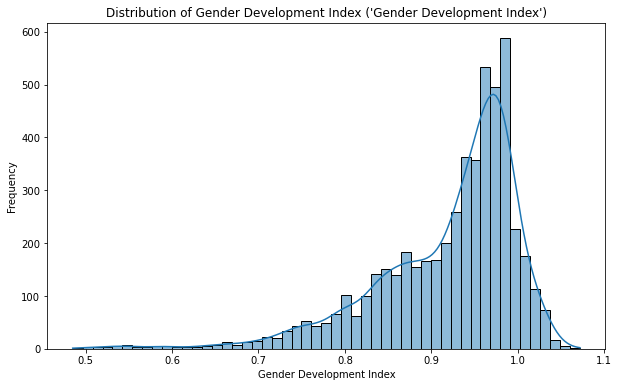

Mean GDI: 0.92
Median GDI: 0.94
Standard Deviation GDI: 0.08


In [91]:
# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(hdi_df["Gender Development Index"], kde=True)
# Adding title labels to the plot
plt.title("Distribution of Gender Development Index ('Gender Development Index')")
plt.xlabel("Gender Development Index")
plt.ylabel('Frequency')
plt.show()


print(f"Mean GDI: {mean_gdi:.2f}")
print(f"Median GDI: {median_gdi:.2f}")
print(f"Standard Deviation GDI: {std_gdi:.2f}")

In [92]:
USA = hdi_df[hdi_df['Entity'] == "United States"]
USA

,Entity,Code,Year,Gender Development Index
4911,United States,USA,1990,0.987
4912,United States,USA,1991,0.988
4913,United States,USA,1992,0.988
4914,United States,USA,1993,0.987
4915,United States,USA,1994,0.988
4916,United States,USA,1995,0.989
4917,United States,USA,1996,0.987
4918,United States,USA,1997,0.988
4919,United States,USA,1998,0.991
4920,United States,USA,1999,0.990


# Above and Beyond Component


In [93]:
hdi_df['GDI_Growth'] = hdi_df.groupby('Code')['Gender Development Index'].pct_change() * 100

hdi_df['GDI_Growth_MA3'] = hdi_df.groupby('Code')['GDI_Growth'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

hdi_df['GDI_Growth_Z'] = hdi_df.groupby('Code')['GDI_Growth'].transform(lambda x: (x - x.mean()) / x.std()).dropna()

columns_to_drop = [col for col in hdi_df.columns if 'GDI_Growth' in col and col != 'GDI_Growth']
hdi_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(hdi_df.head())

        Entity Code  Year  Gender Development Index  GDI_Growth
0  Afghanistan  AFG  1990                     0.595         NaN
1  Afghanistan  AFG  1991                     0.588   -1.176471
2  Afghanistan  AFG  1992                     0.586   -0.340136
3  Afghanistan  AFG  1993                     0.548   -6.484642
4  Afghanistan  AFG  1994                     0.524   -4.379562


# Country's uncertainities contribute to the low GDI

<AxesSubplot:xlabel='Year', ylabel='Gender Development Index'>

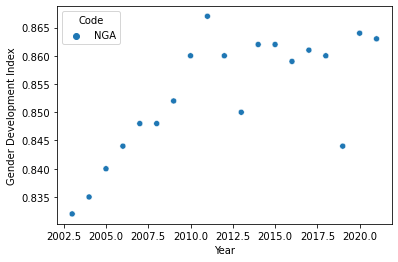

In [94]:
# The GDI varies from time to time just because 
#Filters the dataset to include data only for Nigeria 
Nigeria = hdi_df[hdi_df['Entity'] == "Nigeria"]
sns.scatterplot( x = "Year", 
                 y = "Gender Development Index", 
                 data = Nigeria, 
                 hue = "Code")

<AxesSubplot:xlabel='Year', ylabel='Gender Development Index'>

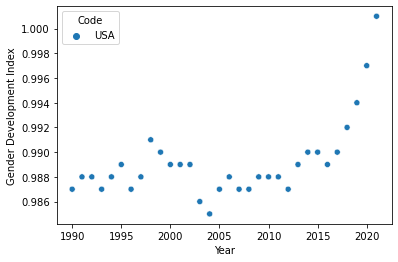

In [95]:
#me too movement
#Filters the dataset to include only data for USA
USA = hdi_df[hdi_df['Entity'] == "United States"]
sns.scatterplot( x = "Year", 
                 y = "Gender Development Index", 
                 data = USA, 
                 hue = "Code")

# Top and Bottom Countries in Gender Development:
Identify the top and bottom countries based on their GDIs.
Create a bar chart to visualize the GDIs of these countries.

In [96]:
# Top 5 countries with highest GDI
top_countries = hdi_df.nlargest(5, "Gender Development Index")
top_countries

,Entity,Code,Year,Gender Development Index,GDI_Growth
2617,Lesotho,LSO,1990,1.072,NaN
2618,Lesotho,LSO,1991,1.060,-1.119403
2619,Lesotho,LSO,1992,1.053,-0.660377
3837,Russia,RUS,2003,1.050,NaN
3838,Russia,RUS,2004,1.050,0.000000


In [97]:
# Bottom 5 countries with lowest GDI
bottom_countries = hdi_df.nsmallest(5, "Gender Development Index")
bottom_countries

,Entity,Code,Year,Gender Development Index,GDI_Growth
5147,Yemen,YEM,2017,0.485,-5.642023
5151,Yemen,YEM,2021,0.496,-2.554028
5148,Yemen,YEM,2018,0.500,3.092784
11,Afghanistan,AFG,2001,0.504,-2.135922
5149,Yemen,YEM,2019,0.508,1.600000


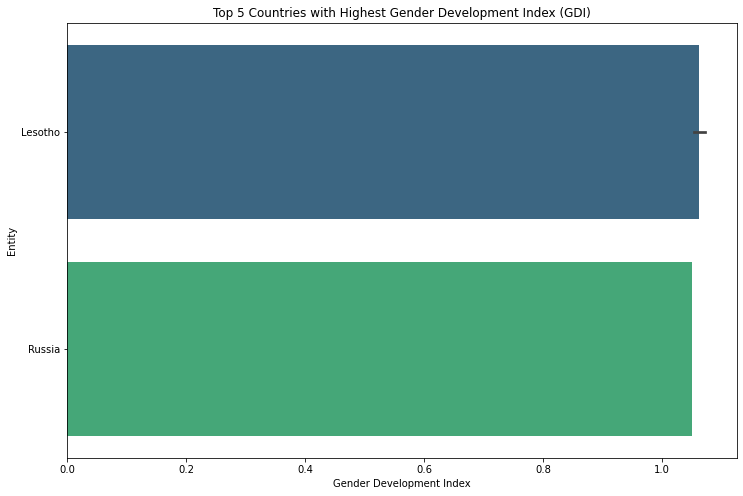

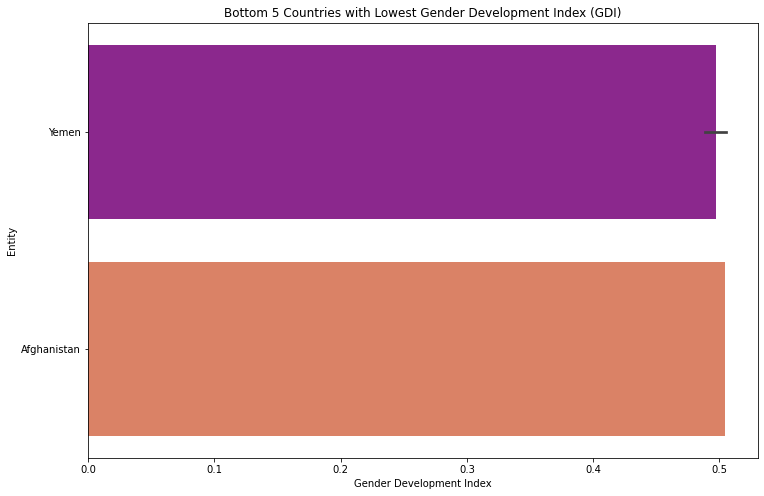

In [98]:
# Plots bar chart for the top 5 countries with the highest Gender Development Index
plt.figure(figsize=(12, 8))
sns.barplot(x="Gender Development Index", y="Entity", data=top_countries, palette='viridis')
plt.title('Top 5 Countries with Highest Gender Development Index (GDI)')
plt.xlabel("Gender Development Index")
plt.ylabel("Entity")
plt.show()

#Plots bar chart for the bottom 5 countries with the lowest Gender Development Index
plt.figure(figsize=(12, 8))
sns.barplot(x="Gender Development Index", y="Entity", data=bottom_countries, palette='plasma')
plt.title('Bottom 5 Countries with Lowest Gender Development Index (GDI)')
plt.xlabel("Gender Development Index")
plt.ylabel("Entity")
plt.show()

Correlation between GDI and Other Indicators:
The correlation between GDI and other development indicators such as life expectancy, education, and income.

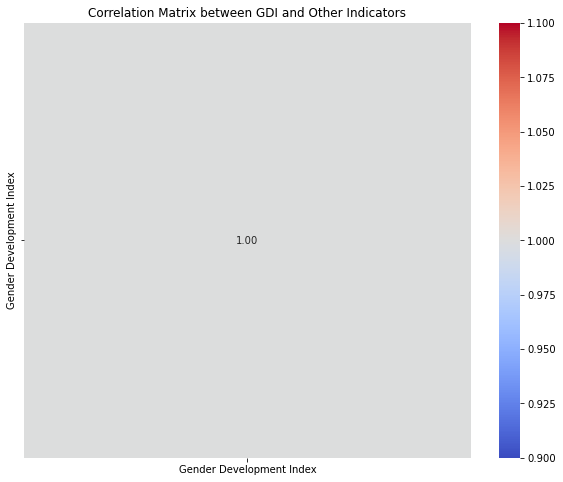

In [103]:
columns_to_include = [col for col in hdi_df.columns if col not in ['Year', 'GDI_Growth']]

# Calculate the correlation matrix for the selected columns only
correlation_matrix = hdi_df[columns_to_include].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between GDI and Other Indicators')
plt.show()

In [100]:
Kenya =  hdi_df[hdi_df['Entity'] == "Kenya"]
Kenya

,Entity,Code,Year,Gender Development Index,GDI_Growth
2425,Kenya,KEN,1990,0.864,NaN
2426,Kenya,KEN,1991,0.876,1.388889
2427,Kenya,KEN,1992,0.871,-0.570776
2428,Kenya,KEN,1993,0.873,0.229621
2429,Kenya,KEN,1994,0.876,0.343643
2430,Kenya,KEN,1995,0.878,0.228311
2431,Kenya,KEN,1996,0.881,0.341686
2432,Kenya,KEN,1997,0.912,3.518729
2433,Kenya,KEN,1998,0.882,-3.289474
2434,Kenya,KEN,1999,0.881,-0.113379
